In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pandas
import pynumdiff
import scipy.fftpack
from IPython.display import display,SVG
import figurefirst
fifi = figurefirst

/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/caveman/BMD2/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:526: Futu

In [2]:
import run_pareto_plot

In [3]:
def get_gamma(dt, freq):
    try:
        g = np.min([100, np.exp(np.log10(freq)*(-3)-1) ])
        
        
        if dt == 0.001:
            return g
        if dt == 0.01:
            return g / 2.5
        if dt == 0.1:
            return g / 5.
        
    except:
        g = [np.min([1000, np.exp(np.log10(f)*(-3)-1) ]) for f in freq]
        
        g = np.array(g)
        
        if dt == 0.001:
            return g
        if dt == 0.01:
            return g / 2.5
        if dt == 0.1:
            return g / 5.


In [4]:
def load_data(fname):
    f = open(fname, 'rb')
    data = pickle.load(f)
    f.close()
    return data

In [5]:
def get_goldilocks_gamma(data):
    rmses = data['rmses_gamma']
    errcorrs = data['errcorrs_gamma']

    threshold = 0.2
    while len(np.where(errcorrs<threshold)[0]) < 1:
        threshold += 0.05
        
    idx_errcorr_okay = np.where(errcorrs<threshold)

    idx_opt =  idx_errcorr_okay[0][np.argmin(rmses[idx_errcorr_okay])]

    opt_rmse = rmses[idx_opt]
    opt_errcorr = errcorrs[idx_opt]
    
    return data['metadata']['gammas'][idx_opt], opt_rmse, opt_errcorr, idx_opt

def plot_direct_goldilocks_gamma(ax, data, color):
    goldgamma, opt_rmse, opt_errcorr, idx_opt = get_goldilocks_gamma(data)

    print('goldilocks rmse and errcorr: ', opt_rmse, opt_errcorr)
    print('opt params: ', data['metadata']['params'][idx_opt])
    
    ax.plot(opt_rmse, opt_errcorr, '*', color=color, markersize=20, markeredgecolor='black')
    
    #ax.set_xlim(1e-1, 1e2)

In [6]:
def plot_example(example, x, x_truth, t, color, data):
    layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                       make_mplfigures=True, hide_layers=[])

    
    ax_pareto = layout.axes[(example, 'pareto')]
    ax_pos = layout.axes[(example, 'sine')]
    
    ax_pos.plot(t, x, '.', color='blue', zorder=-10, markersize=2)
    ax_pos.set_rasterization_zorder(0)
    ax_pos.plot(t, x_truth, '--', color='black')
    
    ax_pareto.plot((data['rmses']), data['errcorrs'], '.', color='gray', zorder=-10, markersize=2)
    ax_pareto.set_rasterization_zorder(0)

    ax_pareto.plot((data['rmses_gamma']), data['errcorrs_gamma'], '.', color=color, zorder=1, markersize=2)
    ax_pareto.plot((data['rmses_gamma']), data['errcorrs_gamma'], '-', color=color)
    plot_direct_goldilocks_gamma(ax_pareto, data, color)
    
    fifi.mpl_functions.adjust_spines(ax_pos, ['left', 'bottom'], 
                                 xticks=xticks['pos'], 
                                 yticks=yticks['pos'],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

    ax_pareto.set_xscale('log')
    ax_pareto.minorticks_off()
    ax_pareto.set_xlim(xlimits['pareto'][0], xlimits['pareto'][1])
    ax_pareto.set_ylim(ylimits['pareto'][0], ylimits['pareto'][1])
    fifi.mpl_functions.adjust_spines(ax_pareto, ['left', 'bottom'], 
                                     xticks=xticks['pareto'], 
                                     yticks=yticks['pareto'],
                                     tick_length=2.5,
                                     spine_locations={'left': 4, 'bottom': 4})
    
    fifi.mpl_functions.set_fontsize(ax_pareto, 6)

    layout.append_figure_to_layer(layout.figures[example], example, cleartarget=True)
    layout.write_svg(figure_layout)

In [7]:
figure_layout = 'fig_2_pad100.svg'

In [8]:
padding = 100

done simulating
pareto_specific_sine_freq_data_varpadding/pareto_data_savgoldiff_linear_model_sine_1_0.1_0.01_4_100.pickle
goldilocks rmse and errcorr:  0.36463970788598515 0.10271967299694716
opt params:  [5, 57, 20]


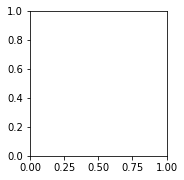

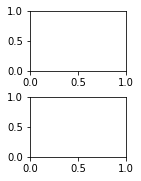

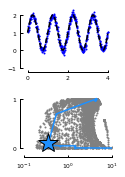

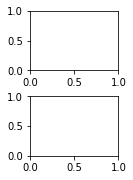

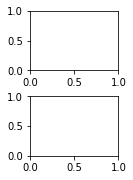

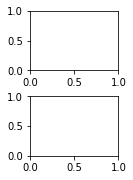

In [9]:
# define problem
example = 'freq_1'
dt = 0.01
noise = 0.1
timeseries_length = 4
problem = 'sine'
freq = 1
read_existing = True
simdt = 0.0001
color = 'dodgerblue'

# define method
method_parent = 'linear_model'
method = 'savgoldiff'

# define limits
xlimits = {'pos': [0,4],
           'vel': [0,4],
           'pareto': [1e-1, 1e1]}
ylimits = {'pos': [-0.2,2.2],
           'vel': [-10, 10],
           'pareto': [-.1, 1.1]}

xticks = { 'pos': [0,2,4],
           'vel': [0,2,4],
           'pareto': [1e-1, 1e0, 1e1]}

yticks = { 'pos': [-1, 0, 1, 2],
           'vel': [-10, -5, 0, 5, 10],
           'pareto': [0, 1]}

r = pynumdiff.utils.simulate.sine(timeseries_length=timeseries_length, 
                                  noise_parameters=[0, noise], 
                                  dt=dt, 
                                  frequencies=[freq])

x, x_truth, dxdt_truth, _ = r
t = np.arange(0, timeseries_length, dt)
print('done simulating')

fname = run_pareto_plot.run_pareto_analysis_on_specific_sine(noise, dt, timeseries_length, problem, freq, method, method_parent, simdt=simdt, read_existing=read_existing, num_gammas=40, padding=padding)
print(fname)
data = load_data(fname)

plot_example(example, x, x_truth, t, color, data)

done simulating
pareto_specific_sine_freq_data_varpadding/pareto_data_savgoldiff_linear_model_sine_10_0.1_0.001_1_100.pickle
goldilocks rmse and errcorr:  4.075360014124106 0.061660613603405266
opt params:  [5, 55, 18]


/home/caveman/BMD2/lib/python3.5/site-packages/matplotlib-2.2.2-py3.5-linux-x86_64.egg/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


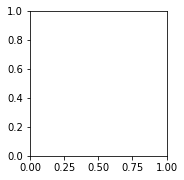

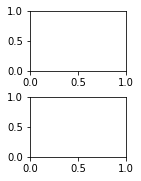

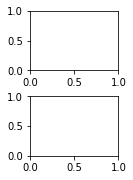

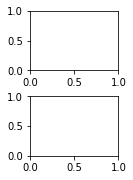

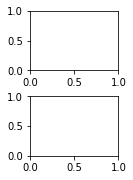

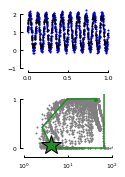

In [10]:
# define problem
example = 'freq_2'
dt = 0.001
noise = 0.1
timeseries_length = 1
problem = 'sine'
freq = 10
read_existing = True
simdt = 0.0001
color = 'forestgreen'

# define method
method_parent = 'linear_model'
method = 'savgoldiff'

# define limits
xlimits = {'pos': [0,1],
           'vel': [0,1],
           'pareto': [0, 1e2]}
ylimits = {'pos': [-0.2,2.2],
           'vel': [-10, 10],
           'pareto': [-.1, 1.1]}

xticks = { 'pos': [0,.5, 1],
           'vel': [0,.5, 1],
           'pareto': [1e0, 1e1, 1e2]}

yticks = { 'pos': [-1, 0, 1, 2],
           'vel': [-10, -5, 0, 5, 10],
           'pareto': [0, 1]}

r = pynumdiff.utils.simulate.sine(timeseries_length=timeseries_length, 
                                  noise_parameters=[0, noise], 
                                  dt=dt, 
                                  frequencies=[freq])

x, x_truth, dxdt_truth, _ = r
t = np.arange(0, timeseries_length, dt)
print('done simulating')

fname = run_pareto_plot.run_pareto_analysis_on_specific_sine(noise, dt, timeseries_length, problem, freq, method, method_parent, simdt=simdt, read_existing=read_existing, num_gammas=40, padding=padding)
print(fname)
data = load_data(fname)

plot_example(example, x, x_truth, t, color, data)

done simulating
pareto_specific_sine_freq_data_varpadding/pareto_data_savgoldiff_linear_model_sine_0.1_0.1_0.01_10_100.pickle
goldilocks rmse and errcorr:  0.03089413130932801 0.0005941323141603165
opt params:  [1, 93, 76]


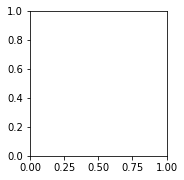

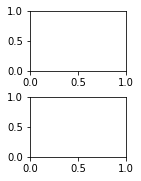

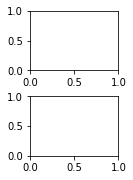

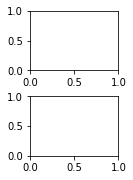

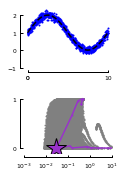

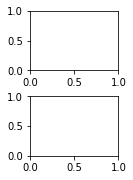

In [11]:
# define problem
example = 'freq_3'
dt = 0.01
noise = 0.1
timeseries_length = 10
problem = 'sine'
freq = 0.1
read_existing = True
simdt = 0.0001
color = 'darkorchid'

# define method
method_parent = 'linear_model'
method = 'savgoldiff'

# define limits
xlimits = {'pos': [0,10],
           'vel': [0,10],
           'pareto': [1e-3, 1e1]}
ylimits = {'pos': [-0.2,2.2],
           'vel': [-10, 10],
           'pareto': [-.1, 1.1]}

xticks = { 'pos': [0,0, 10],
           'vel': [0,0, 10],
           'pareto': [1e-3, 1e-2, 1e-1, 1e0, 1e1]}

yticks = { 'pos': [-1, 0, 1, 2],
           'vel': [-10, -5, 0, 5, 10],
           'pareto': [0, 1]}

r = pynumdiff.utils.simulate.sine(timeseries_length=timeseries_length, 
                                  noise_parameters=[0, noise], 
                                  dt=dt, 
                                  frequencies=[freq])

x, x_truth, dxdt_truth, _ = r
t = np.arange(0, timeseries_length, dt)
print('done simulating')

fname = run_pareto_plot.run_pareto_analysis_on_specific_sine(noise, dt, timeseries_length, problem, freq, method, method_parent, simdt=simdt, read_existing=read_existing, num_gammas=40, padding=padding)
print(fname)
data = load_data(fname)

plot_example(example, x, x_truth, t, color, data)

done simulating
pareto_specific_sine_freq_data_varpadding/pareto_data_savgoldiff_linear_model_sine_0.0001_0.1_0.01_4_100.pickle
goldilocks rmse and errcorr:  0.011325730047161236 0.0001078364399788756
opt params:  [1, 240, 360]


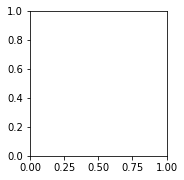

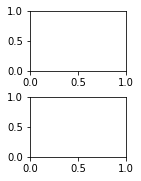

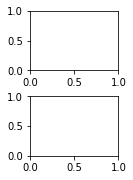

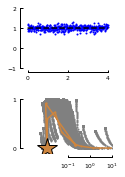

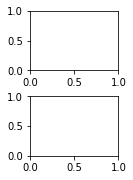

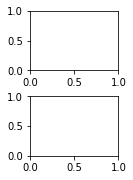

In [12]:
# define problem
example = 'freq_4'
noise = 0.1
dt = 0.01
timeseries_length = 4
problem = 'sine'
freq = 0.0001
read_existing = True
simdt = 0.0001
color = 'peru'

# define method
method_parent = 'linear_model'
method = 'savgoldiff'

# define method
xlimits = {'pos': [0,4],
           'vel': [0,4],
           'pareto': [1e-3, 1e1]}
ylimits = {'pos': [-0.2,2.2],
           'vel': [-10, 10],
           'pareto': [-.1, 1.1]}

xticks = { 'pos': [0,2,4],
           'vel': [0,2,4],
           'pareto': [1e-1, 1e0, 1e1]}

yticks = { 'pos': [-1, 0, 1, 2],
           'vel': [-10, -5, 0, 5, 10],
           'pareto': [0, 1]}

r = pynumdiff.utils.simulate.sine(timeseries_length=timeseries_length, 
                                  noise_parameters=[0, noise], 
                                  dt=dt, 
                                  frequencies=[freq])
x, x_truth, dxdt_truth, _ = r
t = np.arange(0, timeseries_length, dt)
print('done simulating')

fname = run_pareto_plot.run_pareto_analysis_on_specific_sine(noise, dt, timeseries_length, problem, freq, method, method_parent, simdt=simdt, read_existing=read_existing, num_gammas=40, padding=padding)
print(fname)
data = load_data(fname)

plot_example(example, x, x_truth, t, color, data)

In [13]:
raise ValueError()

ValueError: 

In [ ]:
# make freq plots

In [ ]:
def get_filenames(path, contains, does_not_contain=['~', '.pyc']):
    cmd = 'ls ' + '"' + path + '"'
    ls = os.popen(cmd).read()
    all_filelist = ls.split('\n')
    try:
        all_filelist.remove('')
    except:
        pass
    filelist = []
    for i, filename in enumerate(all_filelist):
        if contains in filename:
            fileok = True
            for nc in does_not_contain:
                if nc in filename:
                    fileok = False
            if fileok:
                filelist.append( os.path.join(path, filename) )
    return filelist

In [ ]:
def get_freq_dt_noise_for_files(dirname, method, method_parent):
    filenames = get_filenames(dirname, method)
    freq = []
    dt = []
    noise = []
    fnames = []
    paddings = []
    timeseries_length = []
    
    for fname in filenames:
        data = load_data(fname)
        if method == data['metadata']['method']:
            if method_parent == data['metadata']['method_parent']:
                try:
                    freq.append(data['metadata']['freq'])
                except:
                    freq = None
                dt.append(data['metadata']['dt'])
                noise.append(data['metadata']['noise'])
                fnames.append(fname)
                paddings.append(data['metadata']['padding'])
                timeseries_length.append(data['metadata']['timeseries_length'])
                
        
    df = pandas.DataFrame({'freq': freq,
                           'dt': dt,
                           'noise': noise,
                           'fname': fnames,
                           'padding': paddings,
                           'timeseries_length': timeseries_length})
    return df

In [ ]:
noise = 0.1
dt = 0.01
timeseries_length = 4
freq = None
method = 'savgoldiff'
method_parent = 'linear_model'

In [ ]:
df = get_freq_dt_noise_for_files('pareto_sine_freq_data_varpadding/', 'savgoldiff', 'linear_model')

In [ ]:
query = 'noise == ' + str(noise) + ' and dt == ' + str(dt) + ' and timeseries_length == ' + str(timeseries_length) 
if freq is not None:
    query += ' and freq == ' + str(freq)
dfq = df.query(query)

In [ ]:
dfq

In [ ]:
padding = 1
freq = 0.0001
query = 'freq == ' + str(freq) + ' and padding == ' + str(padding)
fname = dfq.query(query).fname.values[0]
data = load_data(fname)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data['rmses'], data['errcorrs'], '.', color='gray')
ax.plot(data['rmses_gamma'], data['errcorrs_gamma'], '.')
ax.plot(data['rmses_gamma'], data['errcorrs_gamma'])
goldgamma, opt_rmse, opt_errcorr = get_goldilocks_gamma(data)
print(goldgamma)
ax.plot(opt_rmse, opt_errcorr, '*')
ax.set_xscale('log')
ax.set_xlabel('log rmse')
ax.set_ylabel('err corr')
ax.set_title('freq: ' + str(freq) + ' padding: ' + str(padding))

In [ ]:
r = pynumdiff.utils.simulate.sine(timeseries_length=timeseries_length, 
                                  noise_parameters=[0, noise], 
                                  dt=dt, 
                                  frequencies=[freq])

x, x_truth, dxdt_truth, _ = r
t = np.arange(0, timeseries_length, dt)

goldgamma, opt_rmse, opt_errcorr = get_goldilocks_gamma(data)
idxopt = np.argmin( np.abs(data['metadata']['gammas'] - goldgamma) )
params = data['metadata']['params'][idxopt]
print('optimizer params: ', params)
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)
plt.plot(xdot_smooth, color='red')
plt.plot(dxdt_truth, '--', color='black')

In [ ]:
padding = 10
freq = 0.0001
query = 'freq == ' + str(freq) + ' and padding == ' + str(padding)
fname = dfq.query(query).fname.values[0]
data = load_data(fname)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data['rmses'], data['errcorrs'], '.', color='gray')
ax.plot(data['rmses_gamma'], data['errcorrs_gamma'], '.')
ax.plot(data['rmses_gamma'], data['errcorrs_gamma'])
goldgamma, opt_rmse, opt_errcorr = get_goldilocks_gamma(data)
print(goldgamma)
ax.plot(opt_rmse, opt_errcorr, '*')
ax.set_xscale('log')
ax.set_xlabel('log rmse')
ax.set_ylabel('err corr')
ax.set_title('freq: ' + str(freq) + ' padding: ' + str(padding))

In [ ]:
r = pynumdiff.utils.simulate.sine(timeseries_length=timeseries_length, 
                                  noise_parameters=[0, noise], 
                                  dt=dt, 
                                  frequencies=[freq])

x, x_truth, dxdt_truth, _ = r
t = np.arange(0, timeseries_length, dt)

goldgamma, opt_rmse, opt_errcorr = get_goldilocks_gamma(data)
idxopt = np.argmin( np.abs(data['metadata']['gammas'] - goldgamma) )
params = data['metadata']['params'][idxopt]
print('optimizer params: ', params)
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)
plt.plot(xdot_smooth, color='red')
plt.plot(dxdt_truth, '--', color='black')

In [ ]:
padding = 40
freq = 0.0001
query = 'freq == ' + str(freq) + ' and padding == ' + str(padding)
fname = dfq.query(query).fname.values[0]
data = load_data(fname)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data['rmses'], data['errcorrs'], '.', color='gray')
ax.plot(data['rmses_gamma'], data['errcorrs_gamma'], '.')
ax.plot(data['rmses_gamma'], data['errcorrs_gamma'])
goldgamma, opt_rmse, opt_errcorr = get_goldilocks_gamma(data)
print(goldgamma)
ax.plot(opt_rmse, opt_errcorr, '*')
ax.set_xscale('log')
ax.set_xlabel('log rmse')
ax.set_ylabel('err corr')
ax.set_title('freq: ' + str(freq) + ' padding: ' + str(padding))

In [ ]:
r = pynumdiff.utils.simulate.sine(timeseries_length=timeseries_length, 
                                  noise_parameters=[0, noise], 
                                  dt=dt, 
                                  frequencies=[freq])

x, x_truth, dxdt_truth, _ = r
t = np.arange(0, timeseries_length, dt)

goldgamma, opt_rmse, opt_errcorr = get_goldilocks_gamma(data)
idxopt = np.argmin( np.abs(data['metadata']['gammas'] - goldgamma) )
params = data['metadata']['params'][idxopt]
print('optimizer params: ', params)
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)
plt.plot(xdot_smooth, color='red')
plt.plot(dxdt_truth, '--', color='black')

In [ ]:
data['metadata']['params']

In [ ]:
padding = 1
fname = dfq[dfq.padding==padding].fname.values[0]
data = load_data(fname)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data['rmses'], data['errcorrs'], '.', color='gray')
ax.plot(data['rmses_gamma'], data['errcorrs_gamma'], '.')
ax.plot(data['rmses_gamma'], data['errcorrs_gamma'])
goldgamma, opt_rmse, opt_errcorr = get_goldilocks_gamma(data)
print(goldgamma)
ax.plot(opt_rmse, opt_errcorr, '*')
ax.set_xscale('log')
ax.set_xlabel('log rmse')
ax.set_ylabel('err corr')
ax.set_title('padding: ' + str(padding))

In [ ]:
data['metadata']['params']

In [ ]:
data['errcorrs_gamma']

In [ ]:
paramset = run_pareto_plot.get_params_for_method('savgoldiff', 'linear_model')

In [ ]:
paramset

In [ ]:
padding = 5
fname = dfq[dfq.padding==padding].fname.values[0]
data = load_data(fname)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data['rmses'], data['errcorrs'], '.', color='gray')
ax.plot(data['rmses_gamma'], data['errcorrs_gamma'], '.')
ax.plot(data['rmses_gamma'], data['errcorrs_gamma'])
goldgamma, opt_rmse, opt_errcorr = get_goldilocks_gamma(data)
print(goldgamma)
ax.plot(opt_rmse, opt_errcorr, '*')
ax.set_xscale('log')
ax.set_xlabel('log rmse')
ax.set_ylabel('err corr')
ax.set_title('padding: ' + str(padding))

In [ ]:
freqs = []
goldgammas = []

In [ ]:
for idx in dfq.index:
    row = dfq.loc[idx]
    freqs.append(row.freq)
    data = load_data(row.fname)
    goldgamma, opt_rmse, opt_errcorr = get_goldilocks_gamma(data)
    goldgammas.append(goldgamma)

In [ ]:
freqs

In [ ]:
goldgammas

In [ ]:
idx = 6

In [ ]:
data = load_data(dfq.fname.values[idx])

In [ ]:
data

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data['rmses'], data['errcorrs'], '.', color='gray')
ax.plot(data['rmses_gamma'], data['errcorrs_gamma'], '.')
ax.plot(data['rmses_gamma'], data['errcorrs_gamma'])
goldgamma, opt_rmse, opt_errcorr = get_goldilocks_gamma(data)
print(goldgamma)
ax.plot(opt_rmse, opt_errcorr, '*')
ax.set_xscale('log')

In [ ]:
data['metadata']['gammas']

In [ ]:

freq = freqs[idx]

frequencies = [freq]

method_parent = 'linear_model'
method = 'savgoldiff'


r = pynumdiff.utils.simulate.sine(timeseries_length=timeseries_length, 
                                  noise_parameters=[0, noise], 
                                  dt=dt, 
                                  frequencies=frequencies)

x, x_truth, dxdt_truth, _ = r
t = np.arange(0, timeseries_length, dt)

goldgamma, opt_rmse, opt_errcorr = get_goldilocks_gamma(data)
idxopt = np.argmin( np.abs(data['metadata']['gammas'] - goldgamma) )
tvgamma = goldgamma
params = data['metadata']['params'][idxopt]
print('optimizer params: ', params)
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)
plt.plot(xdot_smooth, color='red')
rmse = pynumdiff.utils.evaluate.rmse(xdot_smooth, dxdt_truth, padding='auto')
errcorr = pynumdiff.utils.evaluate.error_correlation(xdot_smooth, dxdt_truth, padding='auto')
print(opt_rmse, opt_errcorr)
print(rmse, errcorr)


tvgamma = get_gamma(dt, freq)
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](x, dt, tvgamma=tvgamma)
print('optimizer params: ', params)
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)
plt.plot(xdot_smooth, color='purple')
rmse = pynumdiff.utils.evaluate.rmse(xdot_smooth, dxdt_truth, padding='auto')
errcorr = pynumdiff.utils.evaluate.error_correlation(xdot_smooth, dxdt_truth, padding='auto')
print(rmse, errcorr)


plt.plot(dxdt_truth, '--', color='black')

In [ ]:
# look at histogram of errors

In [ ]:
tvgamma = get_gamma(dt, freq)
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](x, dt, tvgamma=tvgamma)
print('optimizer params: ', params)
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)

padding = int(0.0025*len(x))
errors = (xdot_smooth[padding:-padding] - dxdt_truth[padding:-padding])
plt.plot(dxdt_truth[padding:-padding], errors, '.', color='black', markersize=2)
r = scipy.stats.linregress(dxdt_truth[padding:-padding], errors)
print('rsq: ', r[2]**2)
print('rmse: ', np.sqrt(np.mean(errors**2) ) )

In [ ]:
goldgamma, opt_rmse, opt_errcorr = get_goldilocks_gamma(data)
idxopt = np.argmin( np.abs(data['metadata']['gammas'] - goldgamma) )
tvgamma = goldgamma
params = data['metadata']['params'][idxopt]
print('optimizer params: ', params)
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)

padding = int(0.0025*len(x))
errors = (xdot_smooth[padding:-padding] - dxdt_truth[padding:-padding])
plt.plot(dxdt_truth[padding:-padding], errors, '.', color='black', markersize=2)
r = scipy.stats.linregress(dxdt_truth[padding:-padding], errors)
print('rsq: ', r[2]**2)
print('rmse: ', np.sqrt(np.mean(errors**2) ) )

In [ ]:
for params in data['metadata']['params']:
    rmse, errcorr = run_pareto_plot.get_rmse_errcorr_for_params(x, x_truth, dxdt_truth, dt, method_parent, method, params)
    print(rmse, errcorr)

In [ ]:
get_goldilocks_gamma(data)

In [ ]:
idx = np.argmin(np.abs(np.array(data['metadata']['gammas']) - 40))
print(data['rmses_gamma'][idx], data['errcorrs_gamma'][idx])


In [ ]:
goldgammas

In [ ]:
get_gamma(dt, 0.0001)

In [ ]:
plt.plot(np.log(freqs), np.log(goldgammas), '.')

In [ ]:
plt.plot(np.log(freqs), np.log(goldgammas), '.')

In [ ]:
np.log(goldgammas)

In [ ]:
# rmse / errcorr for low freq for goldgamma on same trajectory?

In [ ]:
freq = 0.0001
query = 'noise == ' + str(noise) + ' and dt == ' + str(dt) + ' and timeseries_length == ' + str(length) + ' and freq == ' + str(freq)
dfq = df.query(query)

In [ ]:
dfq

In [ ]:
data['errcorrs_gamma']

In [ ]:
data['rmses_gamma']

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data['rmses'], data['errcorrs'], '.', color='gray')
ax.plot(data['rmses_gamma'], data['errcorrs_gamma'], '.')
goldgamma, opt_rmse, opt_errcorr = get_goldilocks_gamma(data)
print(goldgamma)
ax.plot(opt_rmse, opt_errcorr, '*')
ax.set_xscale('log')

In [ ]:
get_gamma(dt, freq)

In [ ]:
data['metadata']['gammas']

In [ ]:
method_parent = 'linear_model'
method = 'savgoldiff'

r = pynumdiff.utils.simulate.sine(timeseries_length=timeseries_length, 
                                  noise_parameters=[0, noise], 
                                  dt=dt, 
                                  frequencies=frequencies)

x, x_truth, dxdt_truth, _ = r
t = np.arange(0, timeseries_length, dt)

tvgamma = 100
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](x, dt, tvgamma=tvgamma, padding=10)
print('optimizer params: ', params)
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)
plt.plot(xdot_smooth, color='red')
plt.plot(dxdt_truth, '--', color='black')